### Exploring Severe Weather Patterns in Colorado

### Contributors:

Varun Mallela - vama3065@colorado.edu

Jagadeesh Nadimpalli - jana3207@colorado.edu

Asher Hrudai Gunnam - asgu1711@colorado.edu

Harish Reddy Pananti - hapa5320@colorado.edu

### Introduction:

Severe weather events pose significant challenges to communities, infrastructure, and public safety. In the context of Colorado, a state known for its diverse geography and weather patterns, understanding the frequency and impact of severe weather occurrences is of paramount importance. This project delves into the comprehensive analysis of severe weather events within specific counties or zones in Colorado, aiming to shed light on their spatial distribution, frequency, and economic consequences.

In this project we start off with some data visualisation to find out the frequency of various severe weathers and after that we identify the percentage of property and crop damage caused due to severe weathers in Colorado. After this we find the variation of magnitude of most frequenlty occured weather event in counties of Denver, Boulder and EL Paso. 

Later we move on to do some data analysis to identify the county or zone within Colorado that experiences the highest occurrence of severe weather events, determine the most frequently occurring types of severe weather in that area, and quantify the total property damage attributed to these events. Through data manipulation and insightful visualizations, we seek to provide a holistic perspective on the dynamics of severe weather, aiding in better preparedness, response, and mitigation efforts.

### Question of Interest:

"What is the spatial distribution of severe weather events within specific counties or zones in Colorado, and how can we determine which area experiences the highest frequency of severe weather occurrences, the most frequent types of severe weather events, and the total property damage caused by these events?"

### Initial Setup:

Let's import packages like pandas, numpy, seaborn and matplotlib for data cleaning, data manipulation and data visualization.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### About the Dataset:

We have taken our dataset from the published public Storm Events Database by National Oceanic and Atmospheric Administration (NOAA). The data into this database was entered by NOAA's National Weather Service (NWS).

This dataset contains information of severe weather events occured in various zones and counties in the state of Colorado from 2018 to 2023. It contains information like the type of severe weather event, the begin and end locaiton of the event, property and crop damage caused by a particular event, deaths and injuried caused by the event. This dataset also contains the magnitude of severe weather event.

This dataset allows us to do examination on effect of severe weather events in Colorado.


This dataset has been uploaded to Github, so let's use the url and read it as a pandas dataframe.

In [30]:
url = 'https://raw.githubusercontent.com/varun-crypto/DTSC-5301-Project/main/Storm_dataset_2018_2023.csv'
df = pd.read_csv(url)


### Data Cleaning

Let's remove some columnms from the dataset which are unnessasary to our analysis.

In [31]:
df.drop(["Unnamed: 0",'TOR_F_SCALE',"STATE_ABBR",'CZ_TIMEZONE','MAGNITUDE_TYPE','EPISODE_ID','CZ_TYPE','CZ_FIPS','WFO','SOURCE',
       'FLOOD_CAUSE', 'TOR_LENGTH', 'TOR_WIDTH','EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER' ], axis=1, inplace=True)

let us now check the data types of the columns

In [32]:
df.dtypes

EVENT_ID                int64
CZ_NAME_STR            object
BEGIN_LOCATION         object
BEGIN_DATE             object
BEGIN_TIME              int64
EVENT_TYPE             object
MAGNITUDE              object
DEATHS_DIRECT           int64
INJURIES_DIRECT         int64
DAMAGE_PROPERTY_NUM     int64
DAMAGE_CROPS_NUM        int64
INJURIES_INDIRECT       int64
DEATHS_INDIRECT         int64
BEGIN_RANGE            object
BEGIN_AZIMUTH          object
END_RANGE              object
END_AZIMUTH            object
END_LOCATION           object
END_DATE               object
END_TIME                int64
BEGIN_LAT              object
BEGIN_LON              object
END_LAT                object
END_LON                object
dtype: object

let us check if there are any duplicated rows and NULL values

In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

EVENT_ID               0
CZ_NAME_STR            0
BEGIN_LOCATION         0
BEGIN_DATE             0
BEGIN_TIME             0
EVENT_TYPE             0
MAGNITUDE              0
DEATHS_DIRECT          0
INJURIES_DIRECT        0
DAMAGE_PROPERTY_NUM    0
DAMAGE_CROPS_NUM       0
INJURIES_INDIRECT      0
DEATHS_INDIRECT        0
BEGIN_RANGE            0
BEGIN_AZIMUTH          0
END_RANGE              0
END_AZIMUTH            0
END_LOCATION           0
END_DATE               0
END_TIME               0
BEGIN_LAT              0
BEGIN_LON              0
END_LAT                0
END_LON                0
dtype: int64

we'll now convert the data types of the rows with numbers to numeric and fill "NAN" values with zeros

In [35]:
df['MAGNITUDE']=pd.to_numeric(df['MAGNITUDE'],errors='coerce').fillna(0)
df['BEGIN_RANGE']=pd.to_numeric(df['BEGIN_RANGE'],errors='coerce').fillna(0)
df['END_RANGE']=pd.to_numeric(df['END_RANGE'],errors='coerce').fillna(0)
df['BEGIN_LAT']=pd.to_numeric(df['BEGIN_LAT'],errors='coerce').fillna(0)
df['BEGIN_LON']=pd.to_numeric(df['BEGIN_LON'],errors='coerce').fillna(0)
df['END_LAT']=pd.to_numeric(df['END_LAT'],errors='coerce').fillna(0)
df['END_LON']=pd.to_numeric(df['END_LON'],errors='coerce').fillna(0)
df['BEGIN_TIME'] = pd.to_datetime(df['BEGIN_TIME'].astype(str).str.zfill(4), format='%H%M').dt.time
df['END_TIME'] = pd.to_datetime(df['END_TIME'].astype(str).str.zfill(4), format='%H%M').dt.time
df['BEGIN_DATE']= pd.to_datetime(df['BEGIN_DATE'])
df['END_DATE']=pd.to_datetime(df['END_DATE'])

let us check the data types of the columns after conversion

In [36]:
df.dtypes

EVENT_ID                        int64
CZ_NAME_STR                    object
BEGIN_LOCATION                 object
BEGIN_DATE             datetime64[ns]
BEGIN_TIME                     object
EVENT_TYPE                     object
MAGNITUDE                     float64
DEATHS_DIRECT                   int64
INJURIES_DIRECT                 int64
DAMAGE_PROPERTY_NUM             int64
DAMAGE_CROPS_NUM                int64
INJURIES_INDIRECT               int64
DEATHS_INDIRECT                 int64
BEGIN_RANGE                   float64
BEGIN_AZIMUTH                  object
END_RANGE                     float64
END_AZIMUTH                    object
END_LOCATION                   object
END_DATE               datetime64[ns]
END_TIME                       object
BEGIN_LAT                     float64
BEGIN_LON                     float64
END_LAT                       float64
END_LON                       float64
dtype: object

In [37]:
Storm_Data = df

### Data Visualisation

Let's start by a visualization which gives the frequency of various weather events in Colorado from 2018 - 2023

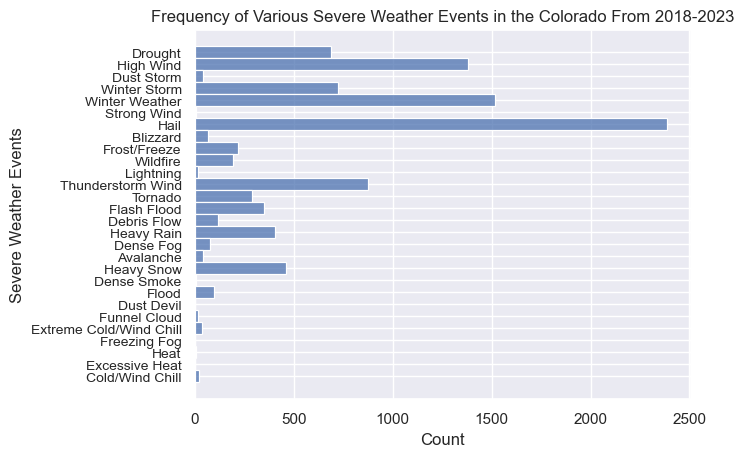

In [38]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns
ax = sns.histplot(data=Storm_Data, y="EVENT_TYPE")
ax.set(ylabel= 'Severe Weather Events', title = 'Frequency of Various Severe Weather Events in the Colorado From 2018-2023')
plt.yticks(fontsize=10)
plt.show()

From the graph we can see that Hail was the most common, followed by Winter Weather and High Wind. Heat, Excessive Heat, Dust Devil and Strong Wind were the rarest. The graph indicates the impact of climate change and the diversity of Colorado’s climate.

Now let's plot a visualisation for the percentage of property damage caused by each of these disasters. For this visualisation we are considering only the events which caused a property damagage greater than zero.

In [39]:
# Filtering all the values with property Damage more than 0

New_Storm_Data = Storm_Data[Storm_Data['DAMAGE_PROPERTY_NUM']>0]
New_Storm_Data = New_Storm_Data.groupby("EVENT_TYPE")["DAMAGE_PROPERTY_NUM"].sum().reset_index()
New_Storm_Data

,EVENT_TYPE,DAMAGE_PROPERTY_NUM
0,Blizzard,100000
1,Debris Flow,158101500
2,Dust Devil,1000
3,Flash Flood,6947610
4,Flood,2944960
5,Hail,618313500
6,Heavy Rain,55000
7,High Wind,218000
8,Lightning,76000
9,Strong Wind,106000


Let us set a threshold of $16000000 for property damage, we have categorised all the events which have caused property damage in USD dollars below this into 'others'.

In [40]:
threshold = 16000000

df_new = New_Storm_Data.copy()

for index, row in New_Storm_Data.iterrows():
    if row["DAMAGE_PROPERTY_NUM"] < threshold:
        df_new.loc[index, "EVENT_TYPE"] = "Other"

df_new = df_new.groupby("EVENT_TYPE")["DAMAGE_PROPERTY_NUM"].sum().reset_index()

df_new

,EVENT_TYPE,DAMAGE_PROPERTY_NUM
0,Debris Flow,158101500
1,Hail,618313500
2,Other,14274890
3,Wildfire,2348571000


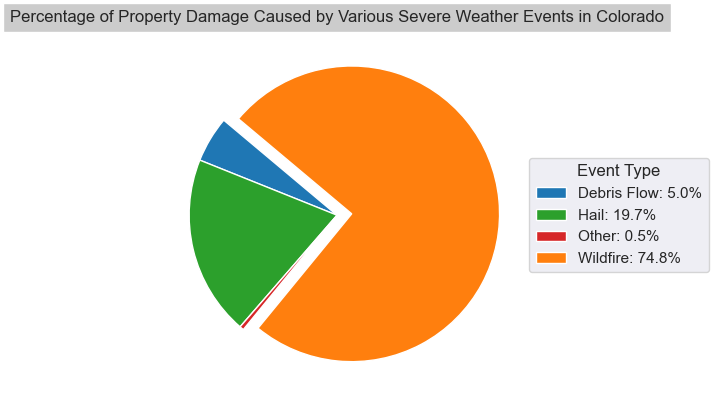

In [41]:
colors = ["#1f77b4", "#2ca02c", "#d62728","#ff7f0e"]

explode = (0, 0, 0, 0.1)  

plt.pie(df_new["DAMAGE_PROPERTY_NUM"], explode=explode, labels=None, 
        colors=colors, autopct=None, startangle=140)
plt.title("Percentage of Property Damage Caused by Various Severe Weather Events in Colorado", 
          bbox={'facecolor':'0.8', 'pad':5})

percentages = ['{:.1f}%'.format(val / sum(df_new["DAMAGE_PROPERTY_NUM"]) * 100) for val in df_new["DAMAGE_PROPERTY_NUM"]]
plt.legend(labels=[f'{event}: {percent}' for event, percent in zip(df_new["EVENT_TYPE"], percentages)],
           title="Event Type",
           loc="center left",
           bbox_to_anchor=(1, 0.5))

plt.show()


The pie chart reveals that wildfire was the most damaging severe weather event in Colorado, accounting for almost three-quarters of the total property damage. Hail was the second most damaging event, causing nearly one-fifth of the property damage. Debris flow was the third most damaging event, contributing to 5% of the property damage. Other types of severe weather events, such as flood, tornado, and winter storm, were negligible in terms of property damage, representing only 0.5% of the total.

Now let's plot a visualization for crop damage percentage by various severe weather events. Here aslo we consider only the events whose have done crop damage in USD dollar more than zero.

In [42]:
New_Storm_Data1 = Storm_Data[Storm_Data['DAMAGE_CROPS_NUM']>0]
New_Storm_Data1 = New_Storm_Data1.groupby("EVENT_TYPE")['DAMAGE_CROPS_NUM'].sum().reset_index()
New_Storm_Data1

,EVENT_TYPE,DAMAGE_CROPS_NUM
0,Flash Flood,645140
1,Flood,557110
2,Frost/Freeze,30000000
3,Hail,509000
4,High Wind,1000
5,Lightning,11000
6,Thunderstorm Wind,45010


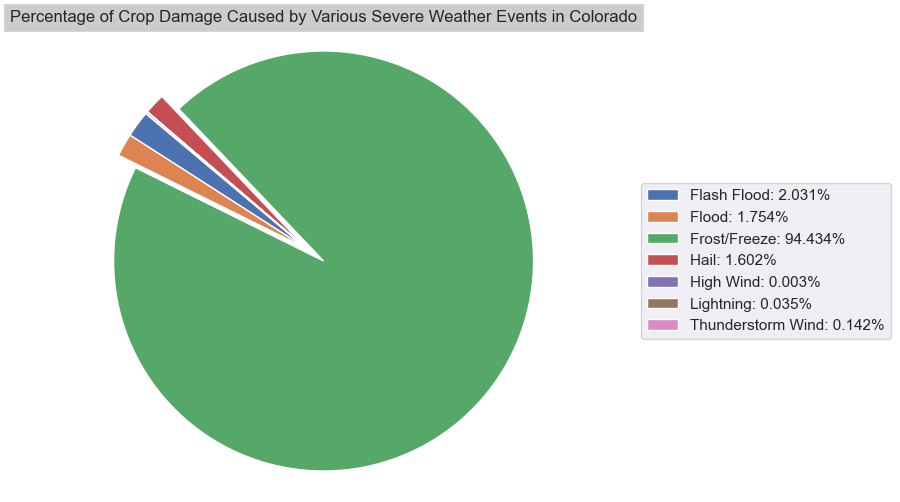

In [43]:
# Create an explode list with the largest slice exploded
explode = [0.1 if event == "Frost/Freeze" else 0 for event in New_Storm_Data1["EVENT_TYPE"]]

# Create a pie chart without labels
plt.figure(figsize=(8, 6))
plt.pie(New_Storm_Data1["DAMAGE_CROPS_NUM"], labels=None, startangle=140, autopct=None, explode=explode)
plt.axis('equal')
plt.title("Distribution of Damaged Crops by Event Type")

# Create a legend with percentages and labels
percentages = ['{:.3f}%'.format(val / sum(New_Storm_Data1["DAMAGE_CROPS_NUM"]) * 100) for val in New_Storm_Data1["DAMAGE_CROPS_NUM"]]
plt.legend(labels=[f'{event}: {percent}' for event, percent in zip(New_Storm_Data1["EVENT_TYPE"], percentages)],
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.title("Percentage of Crop Damage Caused by Various Severe Weather Events in Colorado", 
          bbox={'facecolor':'0.8', 'pad':5})
# Show the pie chart
plt.show()




The pie chart reveals that frost/freeze was the most devastating severe weather event for crops in Colorado, causing 94.4% of the total crop damage. This indicates that Colorado’s agriculture is highly vulnerable to low temperatures and frost damage. The other types of severe weather events, such as flash flood, hail, thunderstorm wind, lightning, and tornado, were much less damaging for crops, accounting for only 5.6% of the total crop damage combined. This suggests that Colorado’s crops are more resilient to water and wind related events than to cold related events.

From the first visualization we found out that Hail was the frequently ocuuring severe weather in Colorado. Let's plot some visualisations for the variation in magnitude of Hail from 2018 to 2023 in Denver, Boulder and EL Paso counties in Colorado.

First Let's start with Denver

Text(0.5, 1.0, 'Variation of magnitude of Hail in Denver from 2018-2023')

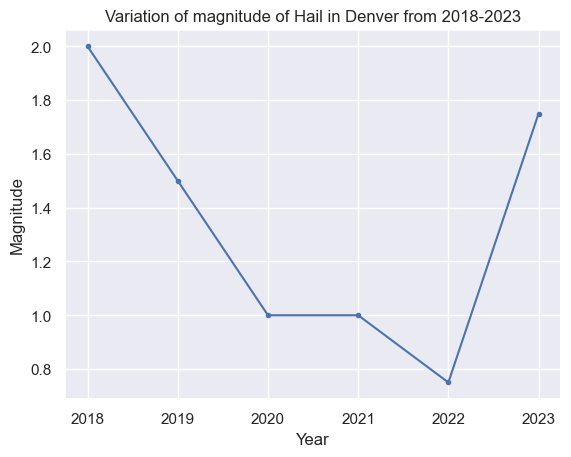

In [44]:
df_de_bo = Storm_Data[(Storm_Data['CZ_NAME_STR'] == 'DENVER CO.' )| (Storm_Data['CZ_NAME_STR'] == 'BOULDER CO.')]
df2=(df_de_bo[(df_de_bo['CZ_NAME_STR']== 'DENVER CO.') & (df_de_bo['EVENT_TYPE']=='Hail')])
df2 = df2.assign(Year=df2['BEGIN_DATE'].dt.year)
df3=df2.groupby(['Year'])['MAGNITUDE'].max()
df3.plot(kind='line',marker='.',ylabel='Magnitude')
plt.title("Variation of magnitude of Hail in Denver from 2018-2023")

We can see from the graph that the magnitude of hail was highest in 2018 and 2023, reaching about 2 and 1.7 respectively. It also shows that the magnitude of hail was lowest in 2022, dropping to about 0.7. The graph suggests that there was a cyclical pattern of hail intensity in Denver, with peaks occurring every five years. 

Now let's plot the same graph for Boulder

Text(0.5, 1.0, 'Variation of magnitude of Hail in Boulder from 2018-2023')

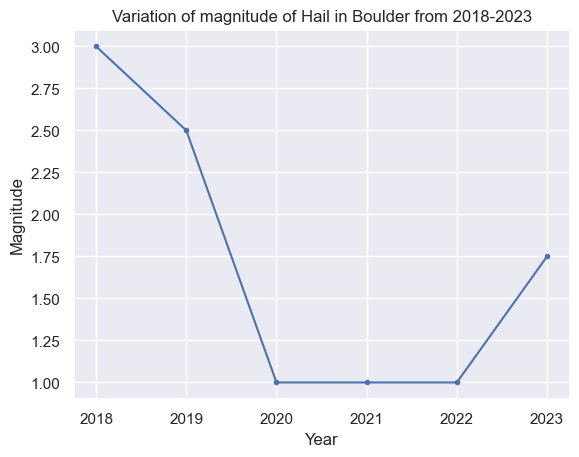

In [45]:
df4=(df_de_bo[(df_de_bo['CZ_NAME_STR']== 'BOULDER CO.') & (df_de_bo['EVENT_TYPE']=='Hail')])
df4 = df4.assign(Year=df4['BEGIN_DATE'].dt.year)
df5=df4.groupby(['Year'])['MAGNITUDE'].max()
df5.plot(kind='line',marker='.',ylabel='Magnitude')
plt.title("Variation of magnitude of Hail in Boulder from 2018-2023")

We can see from the graph that the magnitude of hail was highest in 2018, reaching about 3.0. It also shows that the magnitude of hail was lowest from 2020-2022 dropping to about 1.0. The graph indicates that there was a downward trend of hail intensity in Boulder from 2018 to 2020, followed by a consistant trend from 2020 to 2022 and upward trend from 2022 to 2023.

Finally let's plot the same for EL Paso county

Text(0.5, 1.0, 'Variation of magnitude of Hail in EL PASO from 2018-2023')

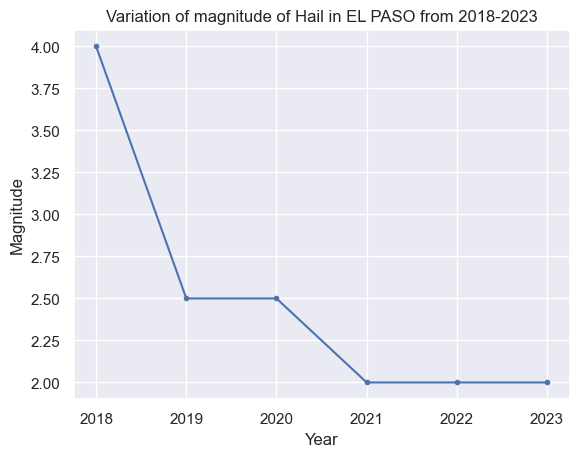

In [46]:
df_el=(df[(df['CZ_NAME_STR']== 'EL PASO CO.') & (df['EVENT_TYPE']=='Hail')])
df_el = df_el.assign(Year=df_el['BEGIN_DATE'].dt.year)
df_el_m=df_el.groupby(['Year'])['MAGNITUDE'].max()
df_el_m.plot(kind='line',marker='.',ylabel='Magnitude')
plt.title("Variation of magnitude of Hail in EL PASO from 2018-2023")

We can see from the graph that the magnitude of hail was highest in 2018, reaching about 4.0. It also shows that the magnitude of hail was lowest and constant from 2021 to 2023, dropping to about 2.0. The graph suggests that there was a downward trend of hail intensity in El Paso from 2018 to 2021, followed by an constant trend from 2021 to 2023.

### Data Analysis

To start our analysis let's first find out which county/zone in Colorado has the highest severe weather occurrences.

In [47]:
value_counts = Storm_Data['CZ_NAME_STR'].value_counts()
value_counts

EL PASO CO.                                                             626
WELD CO.                                                                316
YUMA CO.                                                                293
PUEBLO CO.                                                              220
KIT CARSON CO.                                                          218
                                                                       ... 
EASTERN CHAFFEE COUNTY / WESTERN MOSQUITO RANGE ABOVE 9000 FT (ZONE)      3
RIO GRANDE CO.                                                            3
SAGUACHE COUNTY EAST OF CONTINENTAL DIVIDE BELOW 10000 FT (ZONE)          2
SAGUACHE COUNTY WEST OF CONTINENTAL DIVIDE BELOW 10000 FT (ZONE)          2
CONEJOS CO.                                                               2
Name: CZ_NAME_STR, Length: 147, dtype: int64

We found that El Paso county in Colorado has the highest number of severe weather occurrences.

Now let's check in El PASO which severe weather had the highest number of occurrences.

In [48]:

Storm_Data1 = Storm_Data[Storm_Data['CZ_NAME_STR'] == 'EL PASO CO.'].groupby("CZ_NAME_STR")['EVENT_TYPE'].value_counts()

Storm_Data1

CZ_NAME_STR  EVENT_TYPE       
EL PASO CO.  Hail                 336
             Heavy Rain           208
             Flash Flood           38
             Thunderstorm Wind     29
             Flood                  7
             Tornado                4
             Funnel Cloud           3
             Debris Flow            1
Name: EVENT_TYPE, dtype: int64

Let's plot a histogram to better see these results:

<Axes: title={'center': 'Frequency of severe weather events in EL Paso.'}, xlabel='Count', ylabel='Event Type'>

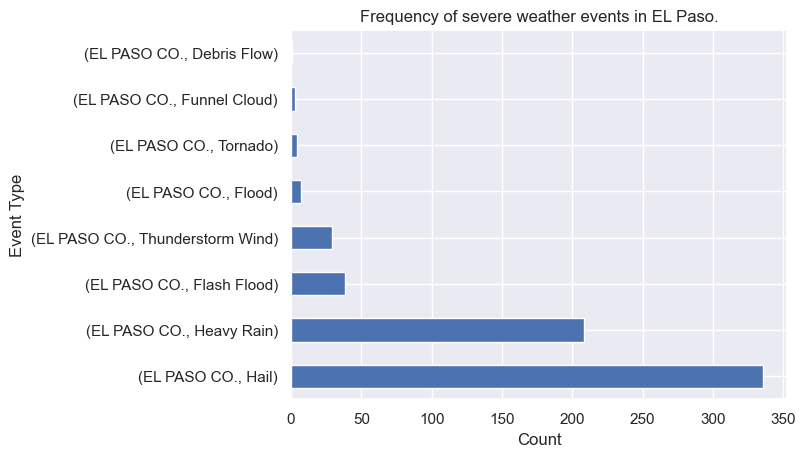

In [49]:
Storm_Data1.plot(kind='barh', xlabel='Count', ylabel='Event Type', title='Frequency of severe weather events in EL Paso.')

We can see that Hail had the highest number of occurrences in El Paso  county.

Now let's find out which severe weather caused the highest property damage in El Paso.

In [50]:
Storm_Data2 = Storm_Data[Storm_Data['CZ_NAME_STR'] == 'EL PASO CO.'].groupby("EVENT_TYPE")['DAMAGE_PROPERTY_NUM'].sum().reset_index()
Storm_Data2

,EVENT_TYPE,DAMAGE_PROPERTY_NUM
0,Debris Flow,0
1,Flash Flood,0
2,Flood,0
3,Funnel Cloud,0
4,Hail,341800000
5,Heavy Rain,0
6,Thunderstorm Wind,0
7,Tornado,0


We can see that Hail was the only severe weather which caused property damage in EL PASO county.

### Conclusion and Bias:

We can see from the above analysis that El Paso county in Colorado is most prone to severe weather events, especially hail, which causes significant property damage. This implies that the residents of El Paso county should be prepared for hailstorms and take measures to protect their properties from hail damage. It also suggests that the climate of El Paso county is different from other counties in Colorado, which may have less frequent or less severe weather events.

However, it's important to consider potential biases in these conclusions. Firstly, the data might be limited in scope and not account for all severe weather events accurately. There could be underreporting or insufficient data collection for other types of severe weather incidents. Moreover, there could be bias in the data collection process itself, with variations in reporting or recording severe weather events across different regions and time periods.

